# 3D Orbital simulations (Assignment 2)

After modifying your Euler and Verlet programs as described above, check them by simulating:

1. Straight down descent
2. Circular orbit
3. Elliptical orbit
4. Hyperbolic escape

For simplicity, take the centre of the planet to be the origin of the coordinate system, and the direction of
the initial velocity to be perpendicular to the initial position vector of the body for Scenarios 2–4. Use zero
initial velocity for Scenario 1. You will obtain different orbits by adjusting the magnitude of the initial
velocity. It might help if you first calculate the required speed for a circular orbit, and the escape velocity
(use the principle of conservation of energy). For Scenario 1, plot altitude as a function of time. For
Scenarios 2–4, plot the trajectory in the orbital plane.

In [3]:
# uncomment the next line if running in a notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

E_radius = 6400000 # (6400 km)

In [4]:
# Vectors : Pos [x, y, z] , Vel [x, y, z]

# Calculate the magnitude of an n dimensional vector
def M(r):
    sum = 0
    for n in r:
        sum += n*n
    return np.sqrt(sum)

# Gravity 
def g(r, G = 6.67e-11, m = 5.92e24):
    return np.array([((-G*m)/(M(r)**3)*i) for i in r])

# Euler integration
def euler_method(t_array, p0, v0, f):
    # initialise the t0 values
    position = np.array(p0)
    velocity = np.array(v0)
    # initialise empty lists to record trajectories
    p_list = []
    v_list = []

    for t in t_array:

        # append current state to trajectories
        p_list.append(position) 
        v_list.append(velocity)

        # calculate new position and velocity
        a = f(position)
        position = position + dt * velocity
        velocity = velocity + a
    
    return (p_list, v_list)

def verlet_method(t_array, dt, p0, v0, f):
    # initialise the t0 values
    position = np.array(p0)
    velocity = np.array(v0)
    # initialise empty lists to record trajectories
    p_list = [position, position + velocity*dt]
    v_list = [velocity]
    
    for t in t_array:
        # calculate new position and velocity
        position = 2*p_list[len(p_list)-1] - p_list[len(p_list)-2] + dt**2*(f(position))
        # dt - 1 velocity
        velocity = (1/(2*dt)) * (position - p_list[len(p_list)-2])
        
        p_list.append(position)
        v_list.append(velocity)

    p_list.pop()
    p_list.pop()
    v_list.pop()

    return (p_list, v_list)

## 1. Straight down Descent

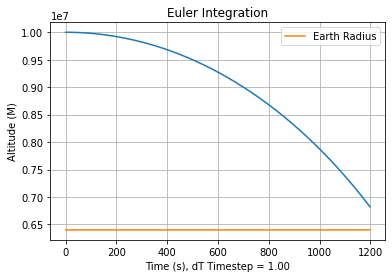

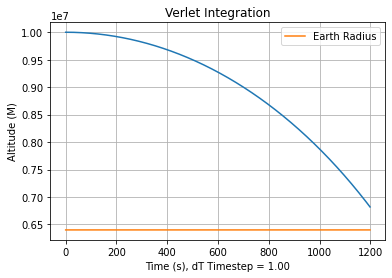

In [5]:
# simulation time, timestep and time
t_max = 1200
dt = 1
t_array = np.arange(0, t_max, dt)

# Earth at 000, work in xy plane, z effectively nil
p0 = [10000e3,0,0]
v0 = [0,0,0]

# euler
p_elist, v_elist = euler_method(t_array, p0, v0, g)
altitude = [M(p) for p in p_elist]

# verlet
p_vlist, v_vlist = verlet_method(t_array, dt, p0, v0, g)
altitudeV = [M(p) for p in p_vlist]

# plot the alt-time graph (/1000 )
plt.figure(1)
plt.title("Euler Integration")
plt.grid()
plt.plot(t_array, altitude)
plt.plot(t_array, [E_radius for i in range(len(t_array))], label="Earth Radius")
#circle1=plt.Circle((0,0),,color='b')
#plt.gcf().gca().add_artist(circle1)
plt.legend()
plt.xlabel("Time (s), dT Timestep = {:.2f}".format(dt))
plt.ylabel("Altitude (M)")

plt.figure(2)
plt.title("Verlet Integration")
plt.grid()
plt.plot(t_array, altitudeV)
plt.plot(t_array, [E_radius for i in range(len(t_array))], label="Earth Radius")
#circle1=plt.Circle((0,0),,color='b')
#plt.gcf().gca().add_artist(circle1)
plt.legend()
plt.xlabel("Time (s), dT Timestep = {:.2f}".format(dt))
plt.ylabel("Altitude (M)")
plt.show()

## 2. Circular Orbit
for a stable orbit:
$$ \frac{-GmM}{|r|^2}=m\frac{v^2}{r} \;, \; v = \sqrt{\frac{GM}{r}}$$
In this case for an 1000km radius, the circular $v = 6283 ms^{-1}$.

The orbital Period:
$$ t = \frac{S}{v} \; , \; t = \frac{2 \pi r}{v} $$
The orbital period is $t = 10000.29 s$.

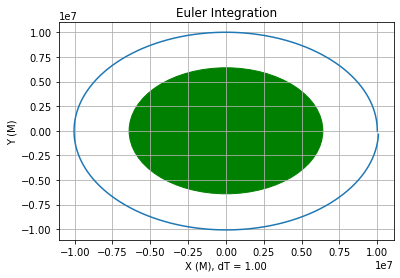

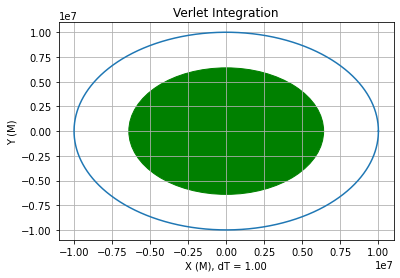

In [18]:
# simulation time, timestep and time
t_max = 10001
dt = 1
t_array = np.arange(0, t_max, dt)

# Earth at 000, work in xy plane, z effectively nil
r_stable = 10000e3
v_stable = np.sqrt((6.67e-11*5.92e24)/r_stable)
p0 = [r_stable,0,0]
v0 = [0,v_stable,0]

# euler
p_elist, v_elist = euler_method(t_array, p0, v0, g)
x_e = [p[0] for p in p_elist]
y_e = [p[1] for p in p_elist]

# verlet
p_vlist, v_vlist = verlet_method(t_array, dt, p0, v0, g)
x_v = [p[0] for p in p_vlist]
y_v = [p[1] for p in p_vlist]

# plot the alt-time graph (/1000 )
plt.figure(1)
plt.title("Euler Integration")
plt.grid()
plt.plot(x_e, y_e)
#plt.plot(t_array, [E_radius for i in range(len(t_array))], label="Earth Radius")
circle1=plt.Circle((0,0),radius=E_radius, color='g')
plt.gcf().gca().add_artist(circle1)
plt.xlabel("X (M), dT = {:.2f}".format(dt))
plt.ylabel("Y (M)")

plt.figure(2)
plt.title("Verlet Integration")
plt.grid()
plt.plot(x_v, y_v)
#plt.plot(t_array, [E_radius for i in range(len(t_array))], label="Earth Radius")
circle1=plt.Circle((0,0),radius=E_radius, color='g')
plt.gcf().gca().add_artist(circle1)
plt.xlabel("X (M), dT = {:.2f}".format(dt))
plt.ylabel("Y (M)")
plt.show()

## 3. Elliptical Orbit
just crank up the initial velocity a tad

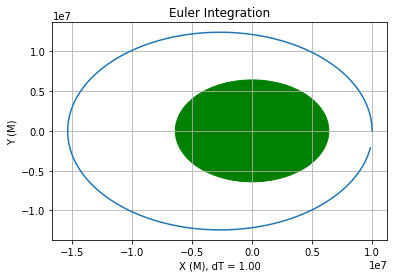

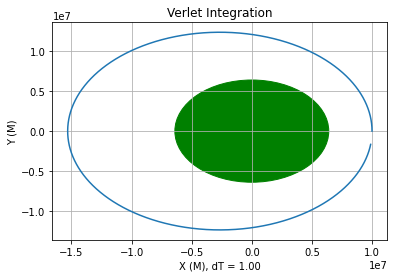

In [22]:
# simulation time, timestep and time
t_max = 14000
dt = 1
t_array = np.arange(0, t_max, dt)

# Earth at 000, work in xy plane, z effectively nil
r_stable = 10000e3
v_stable = np.sqrt((6.67e-11*5.92e24)/r_stable) * 1.1
p0 = [r_stable,0,0]
v0 = [0,v_stable,0]

# euler
p_elist, v_elist = euler_method(t_array, p0, v0, g)
x_e = [p[0] for p in p_elist]
y_e = [p[1] for p in p_elist]

# verlet
p_vlist, v_vlist = verlet_method(t_array, dt, p0, v0, g)
x_v = [p[0] for p in p_vlist]
y_v = [p[1] for p in p_vlist]

# plot the alt-time graph (/1000 )
plt.figure(1)
plt.title("Euler Integration")
plt.grid()
plt.plot(x_e, y_e)
#plt.plot(t_array, [E_radius for i in range(len(t_array))], label="Earth Radius")
circle1=plt.Circle((0,0),radius=E_radius, color='g')
plt.gcf().gca().add_artist(circle1)
plt.xlabel("X (M), dT = {:.2f}".format(dt))
plt.ylabel("Y (M)")

plt.figure(2)
plt.title("Verlet Integration")
plt.grid()
plt.plot(x_v, y_v)
#plt.plot(t_array, [E_radius for i in range(len(t_array))], label="Earth Radius")
circle1=plt.Circle((0,0),radius=E_radius, color='g')
plt.gcf().gca().add_artist(circle1)
plt.xlabel("X (M), dT = {:.2f}".format(dt))
plt.ylabel("Y (M)")
plt.show()

## 4. Hyperbolic Escape
Crank the velocity again!

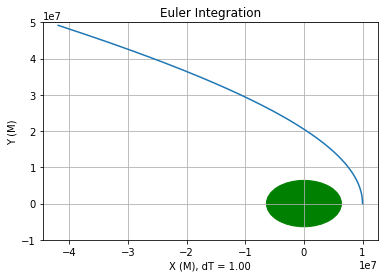

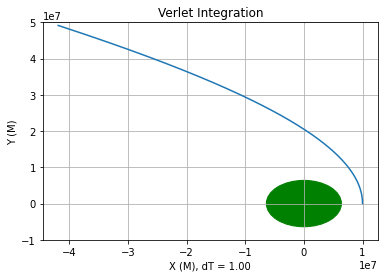

In [29]:
# simulation time, timestep and time
t_max = 14000
dt = 1
t_array = np.arange(0, t_max, dt)

# Earth at 000, work in xy plane, z effectively nil
r_stable = 10000e3
v_stable = 9000
p0 = [r_stable,0,0]
v0 = [0,v_stable,0]

# euler
p_elist, v_elist = euler_method(t_array, p0, v0, g)
x_e = [p[0] for p in p_elist]
y_e = [p[1] for p in p_elist]

# verlet
p_vlist, v_vlist = verlet_method(t_array, dt, p0, v0, g)
x_v = [p[0] for p in p_vlist]
y_v = [p[1] for p in p_vlist]

# plot the alt-time graph (/1000 )
plt.figure(1)
plt.title("Euler Integration")
plt.grid()
plt.plot(x_e, y_e)
#plt.plot(t_array, [E_radius for i in range(len(t_array))], label="Earth Radius")
circle1=plt.Circle((0,0),radius=E_radius, color='g')
plt.gcf().gca().add_artist(circle1)
plt.xlabel("X (M), dT = {:.2f}".format(dt))
plt.ylabel("Y (M)")
plt.ylim((-1e7, 5e7))

plt.figure(2)
plt.title("Verlet Integration")
plt.grid()
plt.plot(x_v, y_v)
#plt.plot(t_array, [E_radius for i in range(len(t_array))], label="Earth Radius")
circle1=plt.Circle((0,0),radius=E_radius, color='g')
plt.gcf().gca().add_artist(circle1)
plt.xlabel("X (M), dT = {:.2f}".format(dt))
plt.ylabel("Y (M)")
plt.ylim((-1e7, 5e7))

plt.show()